<center> <h1> ☕Coffee, Rice and Beef Prices Changes for 30 Years </h1></center>
<center> <h2> Coffee, Rice and Beef Price Changes Taking into Account Inflation Rate </h2></center>

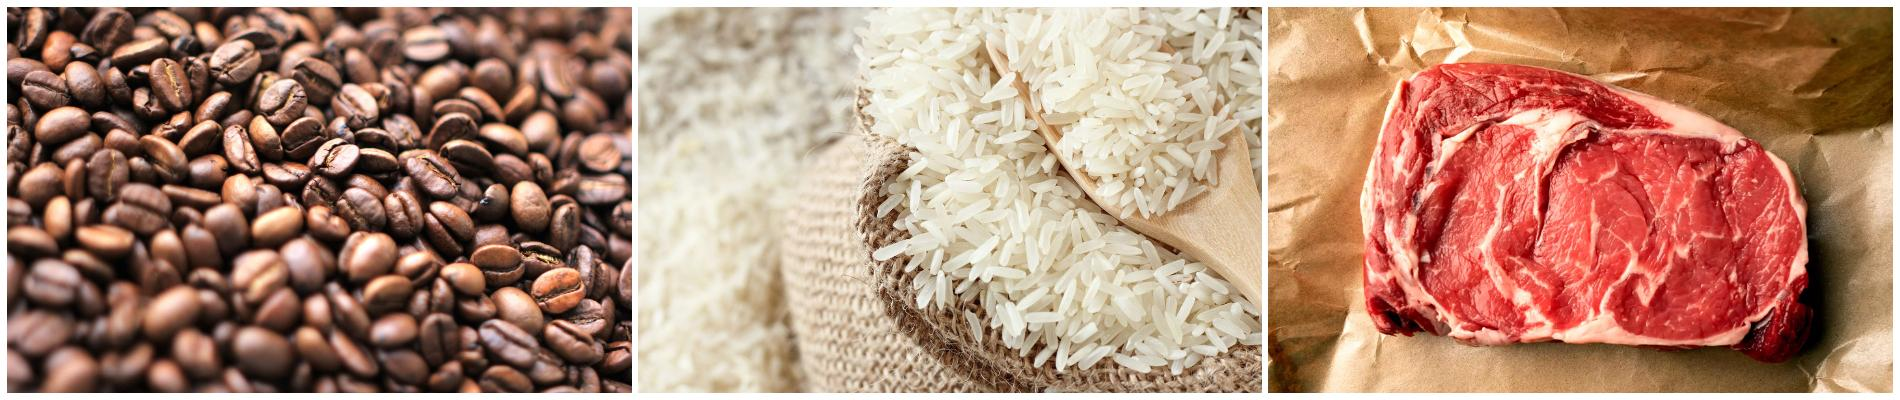

<center> <h1>Introduction</h1></center>

The Dataset consists of the **prices of 3 commodities**
over the course of **30 years**

1. Rice
2. Coffee
3. Beef

The dataset time range is from **Jan 1992 to Jan 2022**

**Columns:**
1. **Year**: The Year of commodity price
2. **Month**: The Month of commodity price
3. **Price_beef_kilo**: Price of 1 Kilo of Beef in USD
4. **Price_rice_kilo**: Price of 1 Kilo of Rice in USD
5. **Price_coffee_kilo**: Price of 1 Kilo of Coffee in USD
6. **Inflation_rate**: Rate of Inflation during the Year,Month (Used to adjust past prices to today's scale)
7. **Price_rice_infl**: Price of 1 Kilo of Rice in USD (Adjusted for inflation)
8. **Price_beef_infl**: Price of 1 Kilo of Beef in USD (Adjusted for inflation)
9. **Price_coffee_infl**: Price of 1 Kilo of Coffee in USD (Adjusted for inflation)

**Goals**:
1. Understand price variation over the years for each commodity.
2. Explore seasonal price variation for each commodity.
3. Explore the spikes and recession in prices.

<center> <h1>Exploring dataset</h1></center>

In [2]:
import os
import pandas as pd
import numpy as np

## Importing data

In [3]:
data = pd.read_csv("rice_beef_coffee_price_changes.csv")

In [4]:
data.shape

(360, 9)

In [5]:
data.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


## Processing missing data

Before we do any analysis let's check the data for any missing values

In [6]:
data.isna().sum().to_frame("Number of missing values").rename_axis("Column Name")

,Number of missing values
Column Name,
Year,0
Month,0
Price_beef_kilo,0
Price_rice_kilo,0
Price_coffee_kilo,0
Inflation_rate,13
Price_rice_infl,13
Price_beef_infl,13
Price_coffee_infl,13


Looks like 13 entries are missing in each column. Most likely a particular time period. Let's check it out.

In [7]:
data[data['Inflation_rate'].isna()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
167,2006,Jan,2.62,0.29,2.74,NaN,NaN,NaN,NaN
168,2006,Feb,2.65,0.30,2.63,NaN,NaN,NaN,NaN
169,2006,Mar,2.62,0.30,2.51,NaN,NaN,NaN,NaN
170,2006,Apr,2.60,0.30,2.54,NaN,NaN,NaN,NaN
171,2006,May,2.62,0.31,2.41,NaN,NaN,NaN,NaN
172,2006,Jun,2.57,0.31,2.27,NaN,NaN,NaN,NaN
173,2006,Jul,2.62,0.32,2.31,NaN,NaN,NaN,NaN
174,2006,Aug,2.66,0.31,2.46,NaN,NaN,NaN,NaN
175,2006,Sep,2.68,0.31,2.42,NaN,NaN,NaN,NaN
176,2006,Oct,2.69,0.30,2.44,NaN,NaN,NaN,NaN


The inflation rates and inflated prices are missing for the periods:
- 12 Months in 2006
- 1 Month in 2022 

This dataset references https://smartasset.com/investing/inflation-calculator for Inflation rate calculation. From that we get
- Inflation Rate = 31.96 for the year 2006


In [8]:
# # Filling in missing inflation rates
# data.loc[data['Year'] == 2006, 'Inflation_rate'] = 31.96
# data.loc[data['Year'] == 2022, 'Inflation_rate'] = 0.0

Now let's also fill the inflated prices for each commodity


    Inflated Price = Past Price * ( 1 + inflation_rate)

In [9]:
# Function to calculate inflation_adjust price
def adjust_for_inflation(price, inflation_rate):
    return round(price * (1 + inflation_rate/100), 2)

In [10]:
# data.head(2)

In [11]:
# Calculate average inflation rate between 2005 and 2007
average_inflation_rate = data[(data['Year'].isin([2005, 2007]))]['Inflation_rate'].mean()

# Filling in missing inflation rate for 2006
data.loc[data['Year'] == 2006, 'Inflation_rate'] = average_inflation_rate

In [12]:
# print(f"$2.52 in 1992 with a cumulative inflation of 89.49% is worth ${adjust_for_inflation(2.52,89.59)} in 2022.")

In [13]:
data.loc[data['Year'] == 2006, 'Price_rice_infl'] = data.loc[data['Year'] == 2006].apply(lambda row: adjust_for_inflation(row['Price_rice_kilo'], row['Inflation_rate']), axis=1)
data.loc[data['Year'] == 2006, 'Price_coffee_infl'] = data.loc[data['Year'] == 2006].apply(lambda row: adjust_for_inflation(row['Price_coffee_kilo'], row['Inflation_rate']), axis=1)
data.loc[data['Year'] == 2006, 'Price_beef_infl'] = data.loc[data['Year'] == 2006].apply(lambda row: adjust_for_inflation(row['Price_beef_kilo'], row['Inflation_rate']), axis=1)

In [14]:
data.isna().sum()

Year                 0
Month                0
Price_beef_kilo      0
Price_rice_kilo      0
Price_coffee_kilo    0
Inflation_rate       1
Price_rice_infl      1
Price_beef_infl      1
Price_coffee_infl    1
dtype: int64

Great! now all missing values are taken care of, we can move on to examining the dataset itself

<center> <h1>Investigating Price Variations through entire period</h1></center>

Let's do the most basic plot of price variation of each commodity over 30 years, and observe any obvious trends

In [15]:
data['Month&Year'] = data['Month'] + ' ' + data['Year'].astype(str)

In [16]:
data['Month&Year'].head(3)

0    Feb 1992
1    Mar 1992
2    Apr 1992
Name: Month&Year, dtype: object

> **Note**: Surprisingly plotly automatically arranges the Month&Year period correctly while plotting without requiring any extra configuration. So we are gonna leave it as it is.

In [17]:
import plotly.express as px
import plotly.graph_objects as go

In [18]:
# Melting the dataset stacks commodity prices in multiple columns into a single column
# We can then easily plot it in the same graph

melted_data = data.melt("Month&Year", value_vars=["Price_beef_infl", "Price_coffee_infl", "Price_rice_infl"],var_name="Price_commodity", value_name="Price (USD)")
melted_data.sample(5, random_state=123)
melted_data

,Month&Year,Price_commodity,Price (USD)
0,Feb 1992,Price_beef_infl,4.78
1,Mar 1992,Price_beef_infl,4.64
2,Apr 1992,Price_beef_infl,4.51
3,May 1992,Price_beef_infl,4.51
4,Jun 1992,Price_beef_infl,4.42
...,...,...,...
1075,Sep 2021,Price_rice_infl,0.39
1076,Oct 2021,Price_rice_infl,0.39
1077,Nov 2021,Price_rice_infl,0.39
1078,Dec 2021,Price_rice_infl,0.39


In [19]:
line_coffee_hex = "#678ee8"
line_rice_hex = "#00d295"
line_beef_hex = "#ff875e"

In [20]:
fig = px.line(
    data_frame=melted_data,
    x="Month&Year",
    y="Price (USD)",
    color="Price_commodity",
    color_discrete_map = {"Price_beef_infl": line_beef_hex, "Price_coffee_infl": line_coffee_hex, "Price_rice_infl": line_rice_hex}
)

# title alignment
fig.update_layout(title_text='Commodity Prices 1992-2022 (Inflation Adjusted)',title_x=0.5)

fig.show()

**Observations**

- Rice seems to be the most stable commodity , with only one noticeable price spike during **February - September 2008**.
- Coffee is the most fluctuating commodity with multiple price spikes and recessions. We'll look into this later.
- Coffee prices are increasing steeply from **April 2021 till date**.
- Beef prices are relatively stable with a couple of price spikes. The biggest one during **2014**.

Now let's do a deeper dive on each ccmmodity

## Rice Prices

Rice only has 1 noticeable price spike during 2008, immediately followed by a steep price decline.

In [21]:
fig = px.line(data_frame=data, x="Month&Year", y="Price_rice_infl",color_discrete_sequence=[line_rice_hex])
fig.add_vrect(x0="Sep 2007", x1="May 2008", line_width=0, fillcolor="green", opacity=0.2)
fig.add_vrect(x0="May 2008", x1="Dec 2008", line_width=0, fillcolor="red", opacity=0.2)
fig.update_layout(
    title="Rice Prices 1992-2022 (Inflation Adjusted)", 
    title_x = 0.5,
    xaxis=dict(title="Month&Year"), 
    yaxis=dict(title="Price (USD)"))
fig.show()

The reason seems to be **2007–2008 world food price crisis**, a period when food prices increased dramatically. Droughts in Australia & USA, Cyclone in Myanmar,  coupled with rising oil prices together may have sparked the crisis.

The prices fell steeply during the **Great Recession of Late 2000s**.

References: \
[[1] **2007–2008 world food price crisis**](https://en.wikipedia.org/wiki/2007%E2%80%932008_world_food_price_crisis) \
[[2] **Drought in Australia**](https://en.wikipedia.org/wiki/Drought_in_Australia#Rainfall_deficiencies_in_2006) \
[[3] **2006 North American heat wave**](https://en.wikipedia.org/wiki/2006_North_American_heat_wave) \
[[4] **Cyclone Nargis - Impact on Rice supplies**](https://en.wikipedia.org/wiki/Cyclone_Nargis#Impact_on_rice_supplies) \
[[5] **2000s energy crisis**](https://en.wikipedia.org/wiki/2000s_energy_crisis) \
[[6] **Great Recession**](https://en.wikipedia.org/wiki/Great_Recession)

## Beef Prices

In [22]:
fig = px.line(data_frame=data, x="Month&Year", y="Price_beef_infl",color_discrete_sequence=[line_rice_hex])
fig.add_vrect(x0="Jan 2008", x1="Dec 2008", line_width=0, fillcolor="red", opacity=0.2) # food price crisis
fig.add_vrect(x0="Jan 2014", x1="Dec 2015", line_width=0, fillcolor="blue", opacity=0.2) # 2014-2015 Cattle price increase
fig.add_vrect(x0="Dec 2019", x1=data.shape[0], line_width=0, fillcolor="violet", opacity=0.2) # Covid-19 pandemic
fig.update_layout(
    title="Beef Prices 1992-2022 (Inflation Adjusted)", 
    title_x = 0.5,
    xaxis=dict(title="Month&Year"), 
    yaxis=dict(title="Price (USD)"))
fig.show()

**Variation Periods:**

### 2008

Beef too seems to be affected by the **2007–2008 world food price crisis**. There is a sharp increase in first half of 2008 and a steep decline in the later half due to the Great recession.

### 2014-2015
During 2014 Cattle prices increased altogether. Causes for this spike may have been due to low supplies in meat, poultry and hog. Prices fell steeply after an all time high during 3rd Quarter of 2014. It's interesting to note that no clear reason has been found for this spike in price, everything is speculative.

### December 2019 till today
The meat market has also been very unstable since the COVID-19 pandemic.We see a sharp decrease in prices during first half of 2020. This is due to closure of restaraunts and food services, beef processors which massively decreased demand for beef. Since 2021 the prices have only seemed to climb, likely due to the resurgence of food delivery services easing up of lockdown restrictions.

References: \
[[7] **Many Causes for Skyrocketing Cattle Prices in 2014**](https://www.farmprogress.com/story-many-causes-skyrocketing-cattle-prices-2014-10-112208) \
[[8] **Lessons Learned from the 2014 and 2015 Cattle Markets**](https://en.wikipedia.org/wiki/Drought_in_Australia#Rainfall_deficiencies_in_2006) \
[[9] **Beef Cattle Markets and COVID-19**](https://onlinelibrary.wiley.com/doi/full/10.1002/aepp.13080)


## Coffee Prices

In [23]:
fig = px.line(data_frame=data, x="Month&Year", y="Price_coffee_infl",color_discrete_sequence=[line_coffee_hex])
fig.add_vrect(x0="Jan 1994", x1="Dec 1994", line_width=0, fillcolor="blue", opacity=0.2)
fig.add_vrect(x0="Jan 1997", x1="Dec 1997", line_width=0, fillcolor="violet", opacity=0.2)
fig.add_vrect(x0="Jun 2010", x1="Dec 2011", line_width=0, fillcolor="red", opacity=0.2)
fig.update_layout(
    title="Coffee Prices 1992-2022 (Inflation Adjusted)", 
    title_x = 0.5,
    xaxis=dict(title="Month&Year"), 
    yaxis=dict(title="Price (USD)"))
fig.show()

Coffee seems to be the most volatile of the 3 commodities. It is interesting to note coffee prices were regulated under the **International Coffee Agreements** from 1963 to 1989, during which prices were relatively stable. However this system collapsed and since 1990 the prices are governed by Supply & Demand.

Let us observe some of the important price variation periods.

### 1994
Brazil accounts for ~37% percent of the world's coffee. A frost in brazil during 1994 damaged more than 50% of Brazil's coffee crops leading to a global shortage and spiking the price of coffee.

### 1997
Colombia, the second biggest coffee grower after Brazil announced coffee crop shortages due to heavy rains destroying their crops. The increase in price was further compounded by fears of a frost in Brazil , causing panic buying of coffee. Prices reached a 20-year high during this period. Due to lack of regulation pure speculation lead to a spike in price.

### 2011
A combination of growing demand of coffee from developing countries such as India, China, Indonesia, Brazil; and a series of dissapointing crop yeilds from Colombia lead to a global coffee shortage during this period.

References:

[[10] **Collapse Of International Coffee Agreement**](https://en.wikipedia.org/wiki/International_Coffee_Agreement#Breakdown_of_the_1989_agreement) \
[[11] **NYTimes 1997 | Coffee Hits a 20-Year High On Rumblings of a Shortage**](https://www.nytimes.com/1997/05/16/business/coffee-hits-a-20-year-high-on-rumblings-of-a-shortage.html) \
[[12] **NYTimes 1997 | Fears of Freeze in Brazil Push Coffee Prices to 20-Year High**](https://www.nytimes.com/1997/05/29/business/fears-of-freeze-in-brazil-push-coffee-prices-to-20-year-high.html) \
[[13] **NYTimes 1994 | Coffee Futures Soar 25%, Biggest Daily Rise in 7 Years**](https://www.nytimes.com/1994/06/28/business/coffee-futures-soar-25-biggest-daily-rise-in-7-years.html) \
[[14] **2011 Hyper-caffeinated coffee prices hit 14-year high**](https://money.cnn.com/2011/02/18/markets/coffee_price/index.htm) \
[[15] **2011 Coffee prices expected to rise as a result of poor harvests and growing demand**](https://www.theguardian.com/business/2011/apr/21/commodities-coffee-shortage-price-rise-expected)


# Seasonal Analysis

Now let's perform a seasonal analysis of each commodity. Showing the price variations over the course of a single year.

For this first we can take a mean of prices in each season.

In [24]:
avg_prices_monthly = data.groupby('Month').mean().reset_index()
avg_prices_monthly

C:\Users\romej\AppData\Local\Temp\ipykernel_28572\1645147792.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Month,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,Apr,2006.5,3.132667,0.372000,2.983333,36.261667,0.482000,4.020667,3.919667
1,Aug,2006.5,3.197000,0.360000,3.008333,36.261667,0.468000,4.090000,3.959667
2,Dec,2006.5,3.193000,0.360333,3.007667,36.261667,0.469667,4.083333,3.940333
3,Feb,2006.5,3.066000,0.369000,2.968667,36.261667,0.483000,3.945667,3.903000
4,Jan,2007.5,3.172000,0.372667,3.048333,34.422759,0.481034,3.902759,3.839655
5,Jul,2006.5,3.155000,0.366000,2.992000,36.261667,0.477000,4.031667,3.948333
6,Jun,2006.5,3.121000,0.369000,2.959333,36.261667,0.479000,3.984667,3.900333
7,Mar,2006.5,3.109333,0.365667,2.990000,36.261667,0.476333,4.002333,3.934000
8,May,2006.5,3.145667,0.369000,3.042333,36.261667,0.477667,4.025000,4.022667
9,Nov,2006.5,3.221333,0.354000,3.004000,36.261667,0.461333,4.117667,3.936000


In [25]:
avg_prices_comm_infl = avg_prices_monthly.melt(id_vars=["Month"], value_vars=['Price_rice_infl', 'Price_beef_infl', 'Price_coffee_infl'],var_name="Price_commodity", value_name="Price (USD)")
avg_prices_comm_infl

,Month,Price_commodity,Price (USD)
0,Apr,Price_rice_infl,0.482000
1,Aug,Price_rice_infl,0.468000
2,Dec,Price_rice_infl,0.469667
3,Feb,Price_rice_infl,0.483000
4,Jan,Price_rice_infl,0.481034
5,Jul,Price_rice_infl,0.477000
6,Jun,Price_rice_infl,0.479000
7,Mar,Price_rice_infl,0.476333
8,May,Price_rice_infl,0.477667
9,Nov,Price_rice_infl,0.461333


In [26]:
fig = px.line(
    data_frame=avg_prices_comm_infl,
    x="Month",
    y="Price (USD)",
    color="Price_commodity",
    color_discrete_map = {"Price_beef_infl": line_beef_hex, "Price_coffee_infl": line_coffee_hex, "Price_rice_infl": line_rice_hex}
)

# title alignment
fig.update_layout(title_text='Commodity Prices Seasonal (Inflation Adjusted)',title_x=0.5)

fig.show()

There is **no visible seasonality in prices of any of the 3 commodities**.

----

<center> <h1>The End</h1> </center>

<center>
Thanks for checking out my notebook! If you liked it take a second of your time to ⬆️ this notebook.<br>
Let me know any mistakes / suggestions in the comments!</center>

In [32]:
# Drop the 'Month&Year' column
data= data.drop('Month&Year', axis=1)

In [30]:
data.to_csv('price2.csv', index=False)

In [28]:
data.columns

Index(['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl',
       'Price_beef_infl', 'Price_coffee_infl', 'Month&Year'],
      dtype='object')

In [29]:
data

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl,Month&Year
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86,Feb 1992
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94,Mar 1992
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75,Apr 1992
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54,May 1992
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46,Jun 1992
...,...,...,...,...,...,...,...,...,...,...
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91,Sep 2021
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24,Oct 2021
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64,Nov 2021
358,2021,Dec,5.95,0.40,5.91,-1.29,0.39,5.87,5.83,Dec 2021
